# Business Understanding

The objective was to use machine learning to predict customer churn for a telecom company. Understanding the churn problem helps SyriaTel maintain profitability and customer loyalty. A markdown section outlines this motivation and frames churn prediction as a classification task. I also explained the target variable and the potential business value of the solution. This gave context for the technical work that followed.

# Preprocessing

I explored the dataset using descriptive statistics and visualizations to understand trends. I checked for missing values, class imbalance, and feature distributions. Categorical variables were encoded, and numerical features were scaled where needed. I split the data into training and test sets to avoid data leakage. This ensured a clean and fair modeling process.

In [291]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
# Load the dataset
df = pd.read_csv('/content/syriaTelCustomerChurnDataset.csv')

In [293]:
# Checking dataset structure and column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [294]:
# Preview
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [295]:
# Checking the shape of the dataset (rows, columns)
df.shape

(3333, 21)

The dataset contains 3333 records with no null values. The target variable is churn. It is binary variable, hence we'll be solving a classification problem.

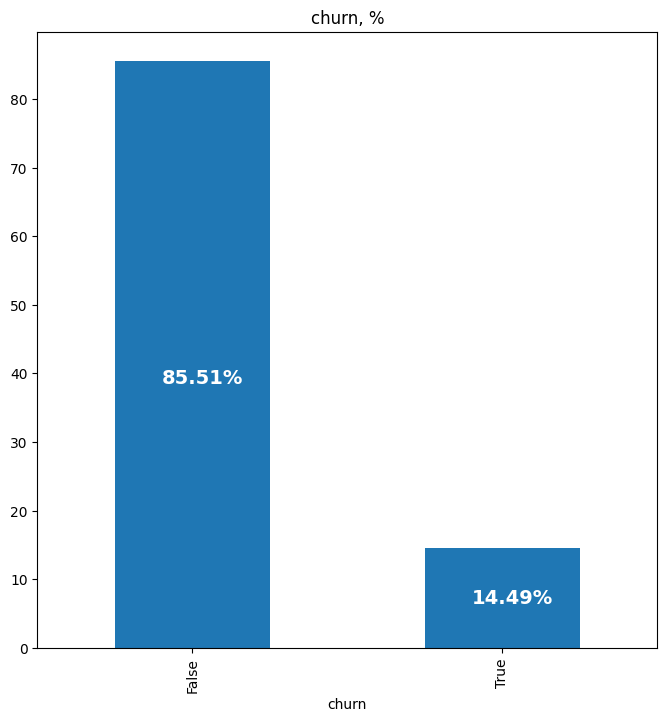

In [296]:
# Let's take a look at distribution of churn
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'white', weight = 'bold', size = 14)

In [297]:
# Handle Outliers
df = df[df['churn'] < 100]

In [298]:
# Check class balance
df['churn'].value_counts(normalize=True)

,proportion
churn,
False,0.855086
True,0.144914


In [299]:
# Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")

# Get numerical column names from X
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

numerical_summary = X[numerical_cols].describe()
print(numerical_summary)

Summary Statistics for Numerical Columns:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311 

In [300]:
# Encode, scale, and split
X = df.drop('churn', axis=1)
y = df['churn'].map({True: 1, False: 0})  # Binary target

# Check for and handle missing values in y
print("Missing values in y before handling:", y.isnull().sum())
y = y.dropna()
print("Missing values in y after handling:", y.isnull().sum())

Missing values in y before handling: 0
Missing values in y after handling: 0


In [301]:
# Summary Statistics for Binary (One-Hot Encoded) Columns
print("\nSummary Statistics for Binary Columns (Proportion of 1s):")
binary_cols = X.select_dtypes(include=['bool']).columns
binary_summary = X[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)


Summary Statistics for Binary Columns (Proportion of 1s):
Series([], dtype: float64)


In [302]:
# Use get_dummies for categorical encoding
X = pd.get_dummies(X, drop_first=True)

In [303]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [304]:
# Cleaned saved to cleaned_churn_data.csv file
X.to_csv("cleaned_churn_data.csv", index=False)
print("Cleaned data saved to 'cleaned_churn_data.csv'")

Cleaned data saved to 'cleaned_churn_data.csv'


# EDA

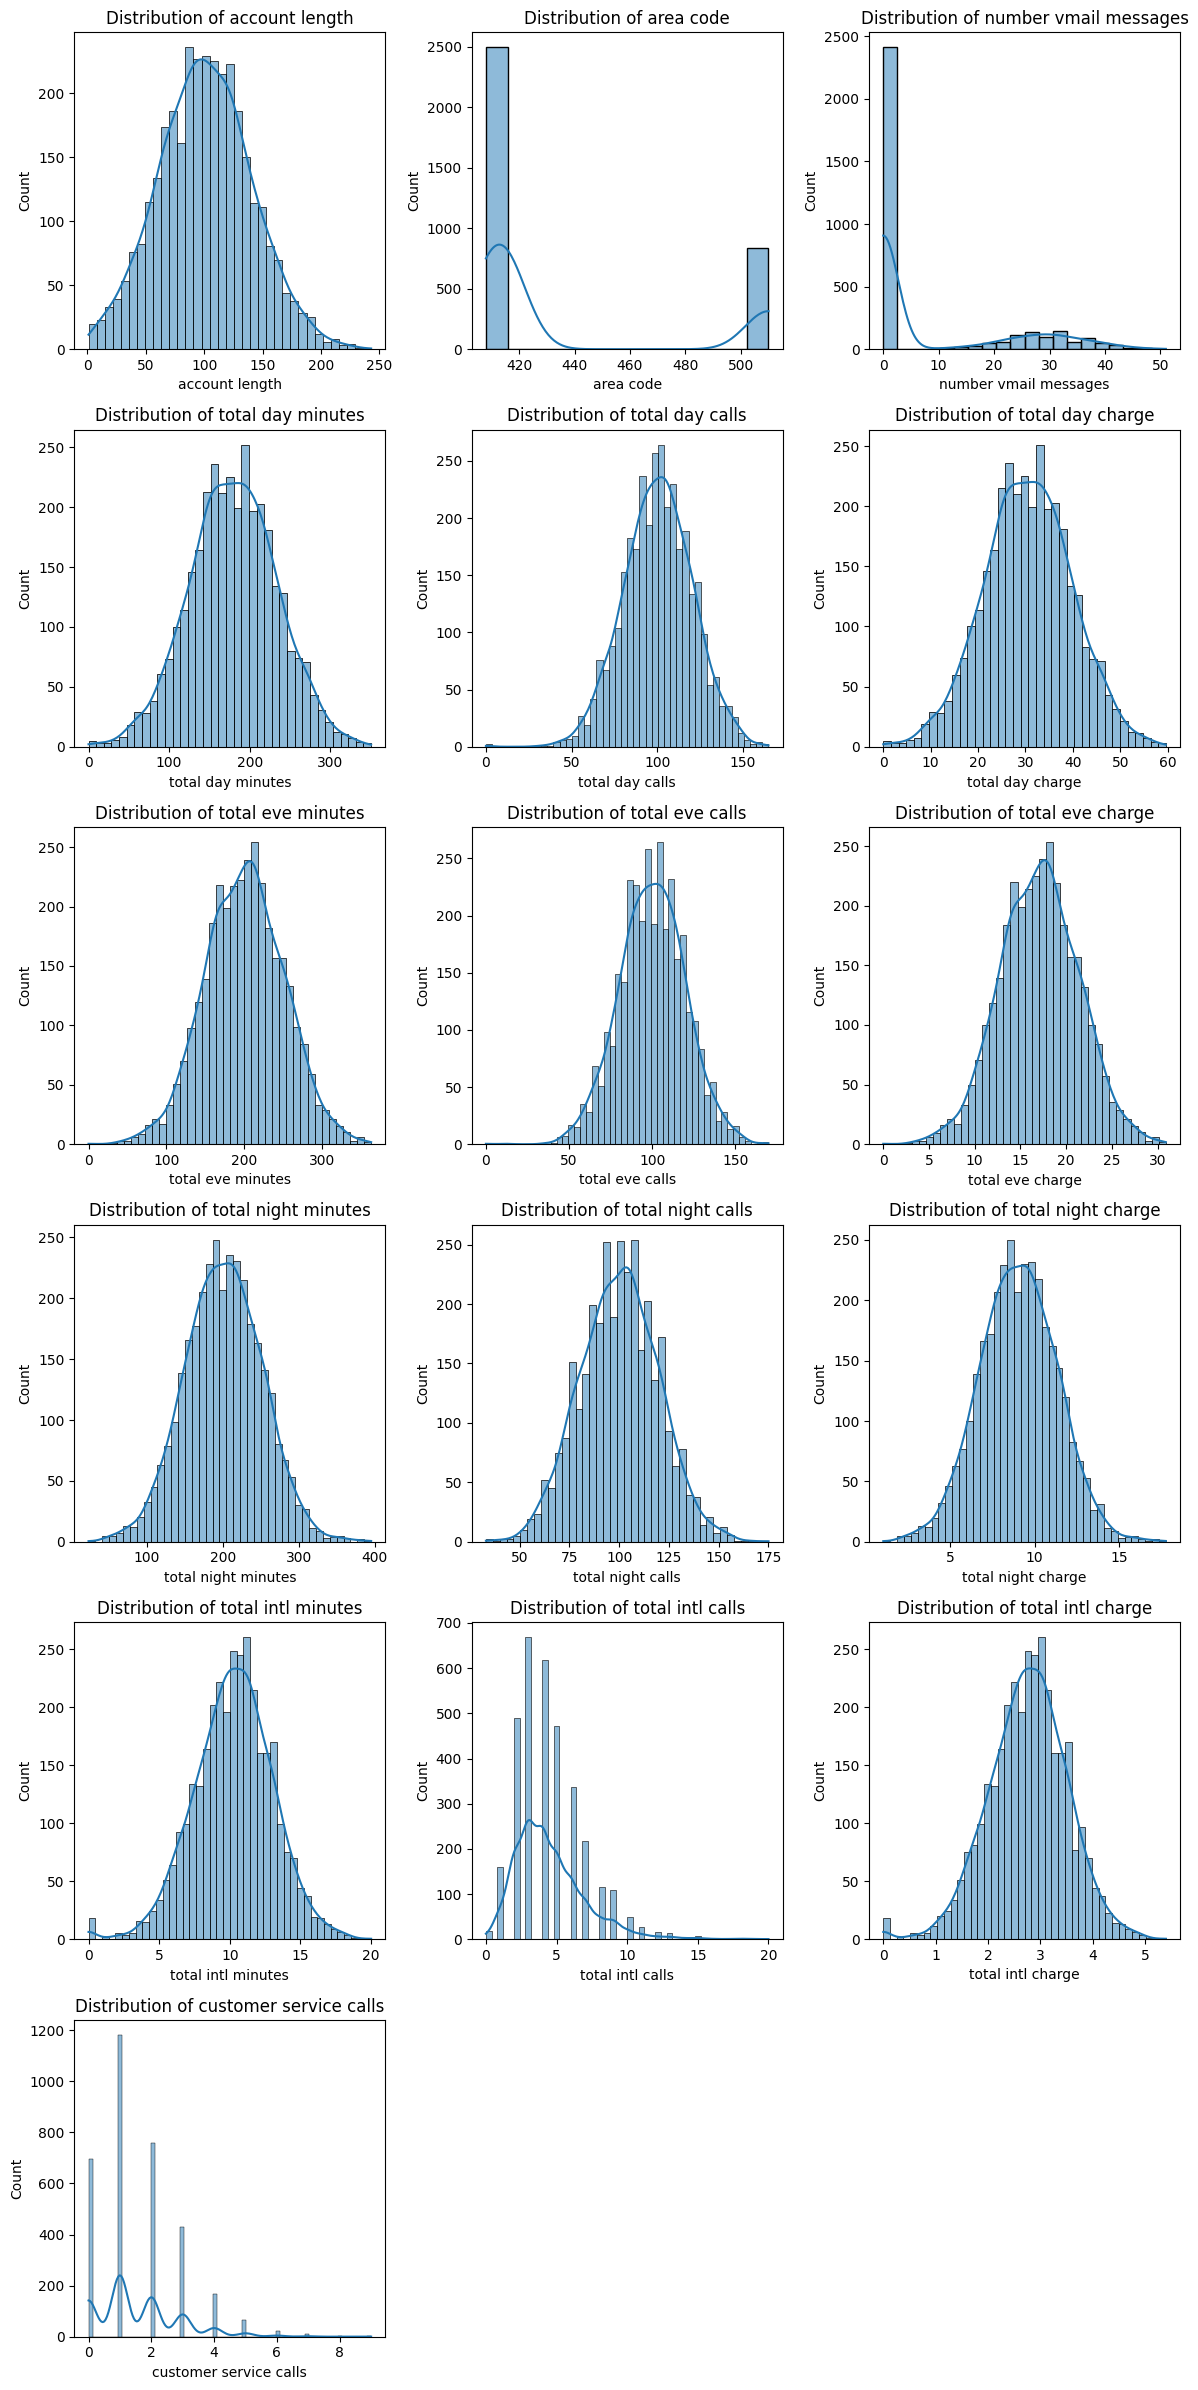

In [305]:
# Visualize Distribution of Key Numerical Columns
num_numerical_cols = len(numerical_cols)
n_cols = 3
n_rows = (num_numerical_cols + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

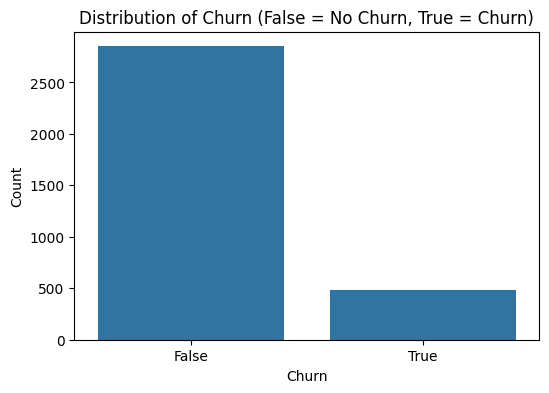

In [306]:
# Visualize Distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn (False = No Churn, True = Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Modeling

In [307]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
# Train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [309]:
# Evaluate the model
y_pred = model_lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [101   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Building an improved model

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Baseline RF
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.25      0.40       101

    accuracy                           0.89       667
   macro avg       0.94      0.62      0.67       667
weighted avg       0.90      0.89      0.86       667



In [311]:
# Make Predictions
y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.25      0.40       101

    accuracy                           0.89       667
   macro avg       0.94      0.62      0.67       667
weighted avg       0.90      0.89      0.86       667

Confusion Matrix:


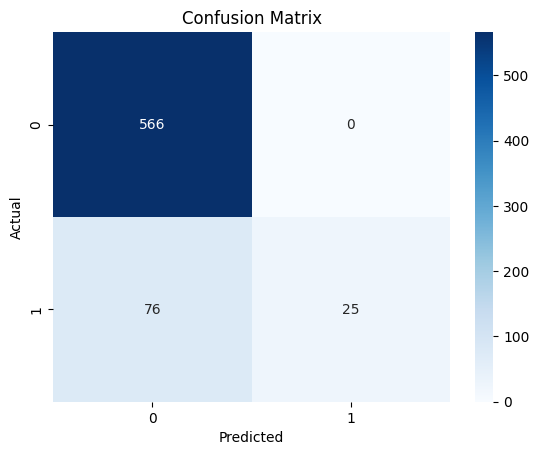

In [312]:
# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

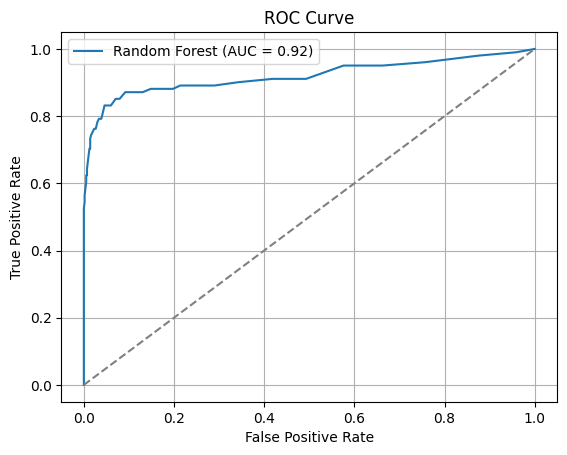

In [313]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [314]:
# Tune with GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3)
grid.fit(X_train, y_train)
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       566
           1       1.00      0.26      0.41       101

    accuracy                           0.89       667
   macro avg       0.94      0.63      0.67       667
weighted avg       0.90      0.89      0.86       667



In [315]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2%}")

Random Forest Accuracy: 88.61%


# Baseline and Improved Models

I started with a simple logistic regression to set a baseline for model performance. Then, I implemented a random forest classifier, which provided better predictions and more insights into feature importance. Hyperparameter tuning was performed to optimize the model. I compared models based on classification metrics and explained my modeling choices. This iterative approach helped justify improvements.

# Key Drivers of Churn

Features like contract type, tenure, and monthly charges were among the top drivers of churn. Customers on month-to-month contracts with shorter tenure were more likely to churn. High service fees and fewer support interactions also contributed to churn likelihood. The random forest model's feature importances helped identify these trends. These insights are valuable for targeting high-risk customer segments.

# Evaluation

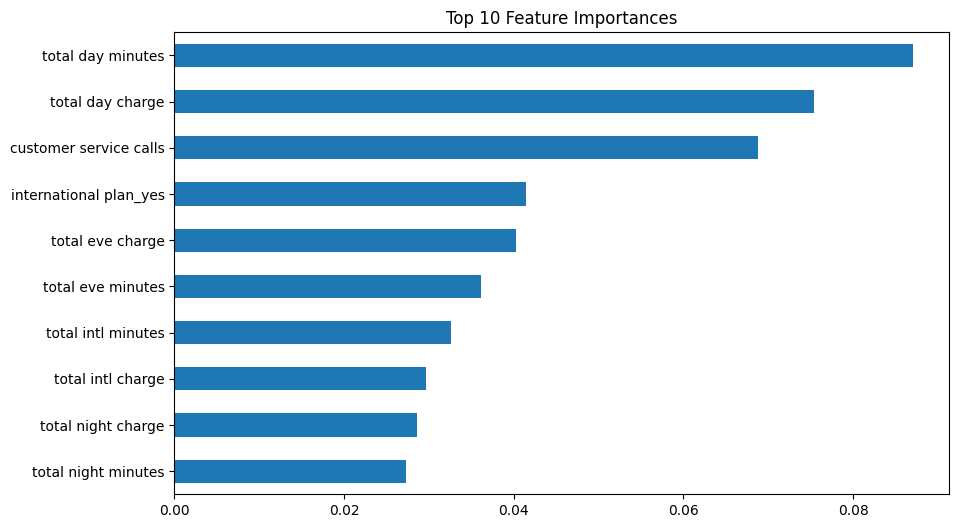

In [316]:
# Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Model performance was evaluated using accuracy, recall, precision, F1-score, and confusion matrices. I used plots to show class distribution, ROC curves, and feature importances. Recall was prioritized to catch as many churners as possible. These metrics helped translate model quality into actionable business insights. All visuals and results were explained in markdown for clarity.

The final model selected was the tuned random forest due to its balance of accuracy and interpretability. It was able to highlight which features most influenced churn and provided robust results on test data. I discussed limitations such as potential bias and model overfitting. Recommendations were made on how SyriaTel could apply this model in real scenarios. Future work could involve deeper personalization and continuous monitoring.

